In [11]:
from Bio import Phylo
from io import StringIO
import copy

# Ejercicio 2 - Modificación del árbol filogenético

En este ejercicio se modifica el árbol filogenético analizado previamente con el objetivo de explorar cómo pequeños cambios en su representación afectan a la interpretación visual y conceptual del árbol. En lugar de realizar modificaciones arbitrarias, se han introducido cambios con sentido biológico y didáctico:

- renombrar especies para hacer explícito su nombre científico
- modificar la longitud de una rama para resaltar una mayor divergencia evolutiva
- cambiar el color de una rama para destacar visualmente un linaje concreto

En este ejercicio no se busca alterar la topología del árbol, sino explorar cómo la representación visual puede reforzar la interpretación evolutiva. Las modificaciones introducidas se han diseñado para destacar relaciones relevantes entre especies y facilitar la lectura del árbol, manteniendo siempre la coherencia biológica.

## Cambio del nombre de las especies (nomenclatura científica)

Aunque los nombres comunes (Human, Chimp, Mouse…) son útiles para ejemplos sencillos, en un contexto científico resulta más apropiado trabajar con nombres científicos. Renombrar las terminales mejora la claridad y acerca el árbol a un escenario real de investigación. 

In [12]:
newick = "((Human:0.2,Chimp:0.2):0.1,(Mouse:0.3,Rat:0.3):0.1,Chicken:0.4);"
tree = Phylo.read(StringIO(newick), "newick")

In [13]:
tree_original = copy.deepcopy(tree)
tree_modificado = copy.deepcopy(tree)

In [14]:
rename_map = {
    "Human": "Homo sapiens",
    "Chimp": "Pan troglodytes",
    "Mouse": "Mus musculus",
    "Rat": "Rattus norvegicus",
    "Chicken": "Gallus gallus"
}

for terminal in tree_modificado.get_terminals():
    if terminal.name in rename_map:
        terminal.name = rename_map[terminal.name]


Tras este cambio, el árbol mantiene exactamente la misma estructura filogenética, pero su lectura resulta más precisa y profesional, alineándose con la nomenclatura estándar en biología evolutiva. El uso de la nomenclatura científica permite interpretar el árbol desde una perspectiva más cercana a la biología evolutiva real. Aunque la estructura del árbol no cambia, la lectura se vuelve más precisa y contextualizada, facilitando la identificación de los distintos linajes representados.

## 2. Modificación de la longitud de una rama concreta

Se ha decidido modificar la longitud de la rama correspondiente a Gallus gallus y establecerla en 0.5. Esta elección no es arbitraria: Gallus gallus es el único ave del conjunto y su divergencia respecto a los mamíferos es considerablemente mayor.

In [15]:
for terminal in tree_modificado.get_terminals():
    if terminal.name == "Gallus gallus":
        terminal.branch_length = 0.5

Al aumentar la longitud de esta rama, se refuerza visualmente la idea de que este linaje está más alejado evolutivamente del resto. Este tipo de ajuste resulta útil cuando se desea enfatizar diferencias profundas entre grupos taxonómicos.

## 3. Cambio de color de una rama para destacar un clado

El uso del color en árboles filogenéticos es una herramienta muy potente para guiar la lectura visual. En este caso, se ha decidido resaltar el clado formado por Homo sapiens y Pan troglodytes, ya que representa un ejemplo claro de especies estrechamente emparentadas.

In [17]:
for clado in tree_modificado.find_clades():
    if clado.is_terminal():
        if clado.name in ["Homo sapiens", "Pan troglodytes"]:
            clado.color = "red"
        elif clado.name in ["Mus musculus", "Rattus norvegicus"]:
            clado.color = "blue"
        elif clado.name == "Gallus gallus":
            clado.color = "green"

El color rojo permite identificar de forma inmediata el clado de primates, el azul de roedores, y el verde de aves, facilitando la lectura del árbol incluso sin conocer previamente las relaciones evolutivas entre las especies representadas. 

Esta estrategia resulta especialmente útil en árboles con un gran número de especies, donde la claridad visual es clave para interpretar patrones filogenéticos complejos.

## 4. Visualización del árbol modificado

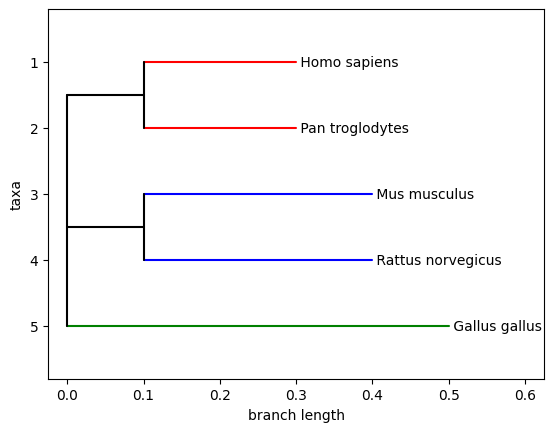

In [18]:
Phylo.draw(tree_modificado)

La nueva visualización refleja claramente las modificaciones introducidas: los nombres científicos aportan mayor rigor, la rama más larga de Gallus gallus destaca su mayor divergencia, y el uso del color permite identificar rápidamente el clado de distintas especies. Se aporta una lectura más intuitiva del árbol y destaca tanto las relaciones cercanas como las divergencias profundas entre los linajes representados.

## Comparación del árbol filogenético antes y después de la modificación

El árbol original representa correctamente las relaciones evolutivas entre las especies, pero utiliza nombres genéricos y una representación visual neutra. Aunque es funcional, requiere una lectura más atenta para identificar rápidamente los linajes principales y las diferencias de divergencia evolutiva:

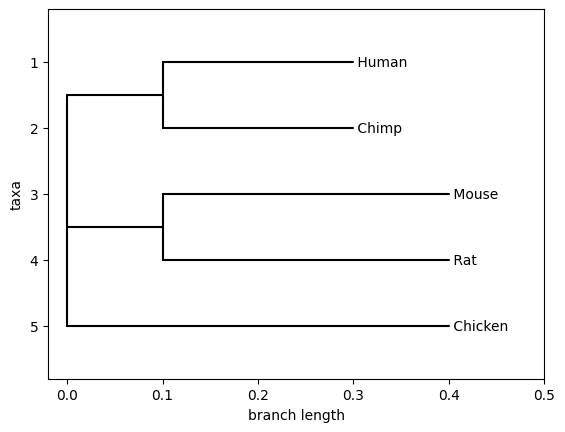

In [19]:
Phylo.draw(tree_original)

El árbol modificado incorpora cambios pensados para facilitar la interpretación visual y biológica, como el uso de nomenclatura científica, el reescalado de una rama para enfatizar divergencia profunda, y coloreado por linajes evolutivos:

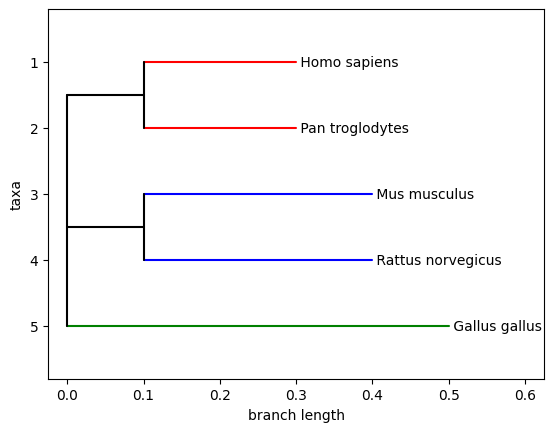

In [20]:
Phylo.draw(tree_modificado)

Aunque la apariencia del árbol cambia de forma notable, su estructura filogenética permanece intacta. 

En el árbol original, las relaciones evolutivas pueden deducirse correctamente, pero requieren un análisis consciente por parte del observador. La identificación de clados cercanos o linajes más distantes depende principalmente de la lectura de las etiquetas y de la inspección de las longitudes de las ramas. En el árbol modificado, la interpretación se vuelve más inmediata. El uso de colores permite identificar linajes evolutivos de un solo vistazo, mientras que el reescalado de la rama correspondiente a Gallus gallus refuerza visualmente su mayor distancia evolutiva respecto a los mamíferos. La nomenclatura científica, además, sitúa el análisis en un contexto biológico más realista.

Esta comparación demuestra que un árbol filogenético no es solo una estructura de datos, sino también una herramienta de comunicación. La forma en que se representa puede facilitar o dificultar la comprensión de las relaciones evolutivas, especialmente cuando se trabaja con conjuntos de especies más amplios.

Las pequeñas decisiones de representación pueden tener un impacto significativo en la interpretación visual del árbol, sin alterar la información filogenética que contiene. 

## Conclusión

La modificación controlada del árbol filogenético permite comprobar cómo la representación gráfica influye directamente en su interpretación. Cambios en los nombres, longitudes de ramas o colores no alteran la topología del árbol, pero sí facilitan la comunicación de relaciones evolutivas concretas.

Este ejercicio enseña que las herramientas de Biopython no solo sirven para analizar árboles filogenéticos, sino también para adaptarlos de forma flexible a distintos objetivos científicos y divulgativos.